In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


import pyTsetlinMachine
from pyTsetlinMachine.tm import MultiClassTsetlinMachine
from pyTsetlinMachine.tm import RegressionTsetlinMachine
from pyTsetlinMachine.tools import Binarizer


In [2]:
number_of_folds = 62

In [3]:
def k10Fold(nfolds,data):
    isOdd = False
    efsize = len(data)//nfolds
    if len(data)-efsize*nfolds:
        isOdd = True
    folds = []
    foldscounter = 0
    counter = 0
    curfold = []
    i = 0
    for item in data:
        if foldscounter < nfolds+1:   #rows / folds
            if counter < efsize :
                curfold.append(i)
                counter += 1
            else:
                foldscounter+=1
                if foldscounter != nfolds:
                    folds.append(curfold)
                    
                    curfold = []
                    curfold.append(i)
                    counter = 1
            i+=1
        else:
            curfold.append(i)
            i+=1
    folds.append(curfold)
    print(folds)
    return folds
def trainTestSpliter(testFolIndex,data):
    test_data = []
    train_data = []
    for i in range(len(data)):
        if i not in testFolIndex:
            train_data.append(data[i])
        else:
            test_data.append(data[i])
    return np.array(train_data), np.array(test_data)
def dataTargetSpluter(train_d,test_d):
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    for i in train_d:
        train_x.append(i[:25])
        train_y.append(i[25])
    for i in test_d:
        test_x.append(i[:25])
        test_y.append(i[25])
    return np.array(train_x), np.array(train_y), np.array(test_x), np.array(test_y)

In [4]:
x = np.loadtxt("maxwell.txt")
df = pd.DataFrame(x,columns = ["F1","F2","F3","F4","F5","F6","F7","F8","F9","F10","F11","F12","F13","F14","F15","F16","F17","F18","F19","F20","F21","F22","F23","F24","F25","Effort"])

In [5]:
"""scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)"""
scaled_data = np.array(df)

In [6]:
foldsIndex = k10Fold(number_of_folds,scaled_data)

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61]]


 
Fold  # 1


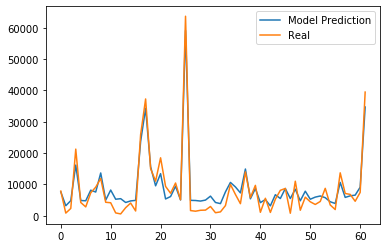

Prediction :  7615.368571428571       real : 7871.0
Prediction :  3197.5985714285716       real : 845.0
Prediction :  4820.452857142857       real : 2330.0
Prediction :  16180.432857142858       real : 21272.0
Prediction :  4865.532142857143       real : 4224.0
Prediction :  4775.373571428571       real : 2826.0
Prediction :  8156.32       real : 7320.0
Prediction :  7570.289285714286       real : 9125.0
Prediction :  13655.992857142857       real : 11900.0
Prediction :  5000.77       real : 4300.0
Prediction :  8201.399285714286       real : 4150.0
Prediction :  5271.245714285715       real : 900.0
Prediction :  5451.562857142857       real : 583.0
Prediction :  4234.422142857143       real : 2565.0
Prediction :  4730.294285714286       real : 4047.0
Prediction :  4910.611428571428       real : 1520.0
Prediction :  23708.67357142857       real : 25910.0
Prediction :  34302.305714285714       real : 37286.0
Prediction :  15639.48142857143       real : 15052.0
Prediction :  9553.7778571

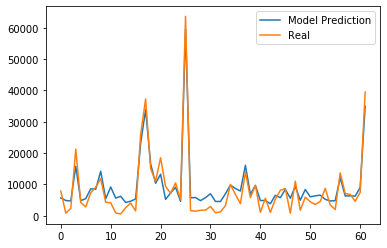

Prediction :  5676.959285714286       real : 7871.0
Prediction :  4865.532142857143       real : 845.0
Prediction :  4730.294285714286       real : 2330.0
Prediction :  15774.719285714285       real : 21272.0
Prediction :  4820.452857142857       real : 4224.0
Prediction :  5451.562857142857       real : 2826.0
Prediction :  8607.112857142856       real : 7320.0
Prediction :  8471.875       real : 9125.0
Prediction :  14196.944285714286       real : 11900.0
Prediction :  5406.483571428572       real : 4300.0
Prediction :  9193.14357142857       real : 4150.0
Prediction :  5631.88       real : 900.0
Prediction :  6217.910714285715       real : 583.0
Prediction :  4234.422142857143       real : 2565.0
Prediction :  4640.135714285714       real : 4047.0
Prediction :  5361.404285714286       real : 1520.0
Prediction :  23122.64285714286       real : 25910.0
Prediction :  33851.51285714286       real : 37286.0
Prediction :  16631.225714285712       real : 15052.0
Prediction :  10365.205    

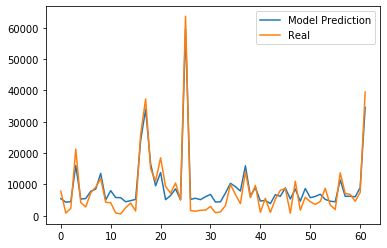

Prediction :  5451.562857142857       real : 7871.0
Prediction :  4324.580714285714       real : 845.0
Prediction :  4504.897857142857       real : 2330.0
Prediction :  16045.195       real : 21272.0
Prediction :  5316.325       real : 4224.0
Prediction :  5496.642142857143       real : 2826.0
Prediction :  7795.685714285714       real : 7320.0
Prediction :  8516.954285714286       real : 9125.0
Prediction :  13520.755       real : 11900.0
Prediction :  5045.8492857142855       real : 4300.0
Prediction :  8021.082142857143       real : 4150.0
Prediction :  5812.197142857143       real : 900.0
Prediction :  5767.117857142857       real : 583.0
Prediction :  4459.818571428572       real : 2565.0
Prediction :  4820.452857142857       real : 4047.0
Prediction :  5226.166428571429       real : 1520.0
Prediction :  24024.22857142857       real : 25910.0
Prediction :  33986.750714285714       real : 37286.0
Prediction :  16586.14642857143       real : 15052.0
Prediction :  9553.777857142857  

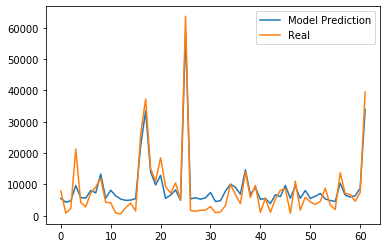

Prediction :  5496.642142857143       real : 7871.0
Prediction :  4324.580714285714       real : 845.0
Prediction :  4730.294285714286       real : 2330.0
Prediction :  9643.93642857143       real : 21272.0
Prediction :  5812.197142857143       real : 4224.0
Prediction :  5631.88       real : 2826.0
Prediction :  8066.161428571429       real : 7320.0
Prediction :  7299.813571428572       real : 9125.0
Prediction :  13340.437857142857       real : 11900.0
Prediction :  5586.800714285714       real : 4300.0
Prediction :  8156.32       real : 4150.0
Prediction :  6353.148571428572       real : 900.0
Prediction :  5316.325       real : 583.0
Prediction :  4910.611428571428       real : 2565.0
Prediction :  5000.77       real : 4047.0
Prediction :  5451.562857142857       real : 1520.0
Prediction :  22266.13642857143       real : 25910.0
Prediction :  33445.79928571429       real : 37286.0
Prediction :  14016.627142857144       real : 15052.0
Prediction :  9824.253571428571       real : 110

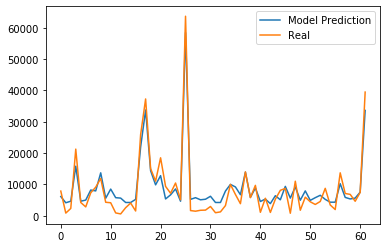

Prediction :  6127.752142857143       real : 7871.0
Prediction :  4144.263571428572       real : 845.0
Prediction :  4640.135714285714       real : 2330.0
Prediction :  15819.798571428571       real : 21272.0
Prediction :  4640.135714285714       real : 4224.0
Prediction :  5000.77       real : 2826.0
Prediction :  8201.399285714286       real : 7320.0
Prediction :  7930.923571428571       real : 9125.0
Prediction :  13701.072142857143       real : 11900.0
Prediction :  5586.800714285714       real : 4300.0
Prediction :  8516.954285714286       real : 4150.0
Prediction :  5767.117857142857       real : 900.0
Prediction :  5631.88       real : 583.0
Prediction :  4234.422142857143       real : 2565.0
Prediction :  4234.422142857143       real : 4047.0
Prediction :  5226.166428571429       real : 1520.0
Prediction :  21950.58142857143       real : 25910.0
Prediction :  33761.35428571429       real : 37286.0
Prediction :  14377.261428571428       real : 15052.0
Prediction :  9869.33285714

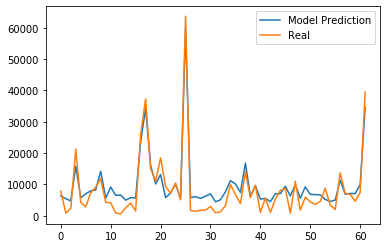

Prediction :  6353.148571428572       real : 7871.0
Prediction :  5451.562857142857       real : 845.0
Prediction :  4730.294285714286       real : 2330.0
Prediction :  15819.798571428571       real : 21272.0
Prediction :  5722.038571428571       real : 4224.0
Prediction :  7029.3378571428575       real : 2826.0
Prediction :  7930.923571428571       real : 7320.0
Prediction :  8246.478571428572       real : 9125.0
Prediction :  14196.944285714286       real : 11900.0
Prediction :  5586.800714285714       real : 4300.0
Prediction :  9148.064285714287       real : 4150.0
Prediction :  6533.465714285714       real : 900.0
Prediction :  6623.624285714286       real : 583.0
Prediction :  4955.690714285714       real : 2565.0
Prediction :  5767.117857142857       real : 4047.0
Prediction :  5676.959285714286       real : 1520.0
Prediction :  23618.515       real : 25910.0
Prediction :  34302.305714285714       real : 37286.0
Prediction :  16135.353571428572       real : 15052.0
Prediction : 

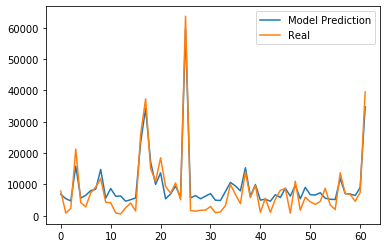

Prediction :  6849.020714285714       real : 7871.0
Prediction :  5451.562857142857       real : 845.0
Prediction :  4730.294285714286       real : 2330.0
Prediction :  15819.798571428571       real : 21272.0
Prediction :  5631.88       real : 4224.0
Prediction :  6533.465714285714       real : 2826.0
Prediction :  8021.082142857143       real : 7320.0
Prediction :  8471.875       real : 9125.0
Prediction :  14782.975       real : 11900.0
Prediction :  5586.800714285714       real : 4300.0
Prediction :  8697.271428571428       real : 4150.0
Prediction :  6217.910714285715       real : 900.0
Prediction :  6308.069285714286       real : 583.0
Prediction :  4640.135714285714       real : 2565.0
Prediction :  5136.007857142858       real : 4047.0
Prediction :  5676.959285714286       real : 1520.0
Prediction :  23393.11857142857       real : 25910.0
Prediction :  34257.22642857143       real : 37286.0
Prediction :  17217.25642857143       real : 15052.0
Prediction :  10004.570714285714    

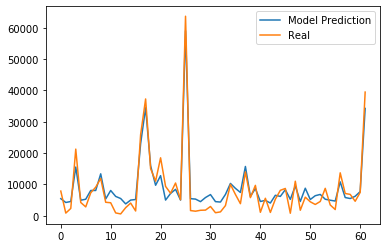

Prediction :  5451.562857142857       real : 7871.0
Prediction :  4234.422142857143       real : 845.0
Prediction :  4549.977142857143       real : 2330.0
Prediction :  15549.322857142857       real : 21272.0
Prediction :  4955.690714285714       real : 4224.0
Prediction :  5271.245714285715       real : 2826.0
Prediction :  8066.161428571429       real : 7320.0
Prediction :  8066.161428571429       real : 9125.0
Prediction :  13385.517142857143       real : 11900.0
Prediction :  5361.404285714286       real : 4300.0
Prediction :  8066.161428571429       real : 4150.0
Prediction :  6172.831428571429       real : 900.0
Prediction :  5496.642142857143       real : 583.0
Prediction :  3783.6292857142857       real : 2565.0
Prediction :  5000.77       real : 4047.0
Prediction :  5181.087142857143       real : 1520.0
Prediction :  23032.484285714287       real : 25910.0
Prediction :  34482.62285714286       real : 37286.0
Prediction :  15955.036428571428       real : 15052.0
Prediction :  9

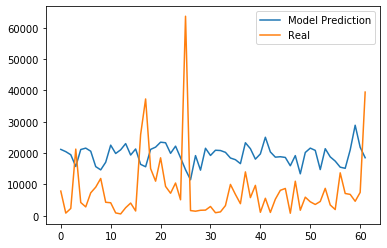

Prediction :  21184.233571428573       real : 7871.0
Prediction :  20462.965       real : 845.0
Prediction :  19471.220714285715       real : 2330.0
Prediction :  15729.64       real : 21272.0
Prediction :  21139.154285714285       real : 4224.0
Prediction :  21589.94714285714       real : 2826.0
Prediction :  20598.202857142856       real : 7320.0
Prediction :  15684.560714285713       real : 9125.0
Prediction :  14647.737142857142       real : 11900.0
Prediction :  17082.018571428573       real : 4300.0
Prediction :  22536.612142857142       real : 4150.0
Prediction :  19876.934285714287       real : 900.0
Prediction :  21048.995714285713       real : 583.0
Prediction :  23032.484285714287       real : 2565.0
Prediction :  19381.062142857143       real : 4047.0
Prediction :  21319.47142857143       real : 1520.0
Prediction :  16405.829285714288       real : 25910.0
Prediction :  15639.48142857143       real : 37286.0
Prediction :  21184.233571428573       real : 15052.0
Prediction : 

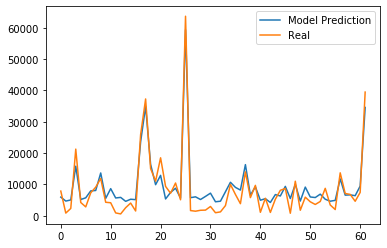

Prediction :  5947.435       real : 7871.0
Prediction :  4685.215       real : 845.0
Prediction :  5045.8492857142855       real : 2330.0
Prediction :  15819.798571428571       real : 21272.0
Prediction :  5181.087142857143       real : 4224.0
Prediction :  5722.038571428571       real : 2826.0
Prediction :  7930.923571428571       real : 7320.0
Prediction :  8066.161428571429       real : 9125.0
Prediction :  13655.992857142857       real : 11900.0
Prediction :  5541.721428571429       real : 4300.0
Prediction :  8652.192142857144       real : 4150.0
Prediction :  5676.959285714286       real : 900.0
Prediction :  5857.276428571428       real : 583.0
Prediction :  4595.056428571428       real : 2565.0
Prediction :  5271.245714285715       real : 4047.0
Prediction :  5136.007857142858       real : 1520.0
Prediction :  23618.515       real : 25910.0
Prediction :  34933.415714285715       real : 37286.0
Prediction :  16405.829285714288       real : 15052.0
Prediction :  9914.412142857143

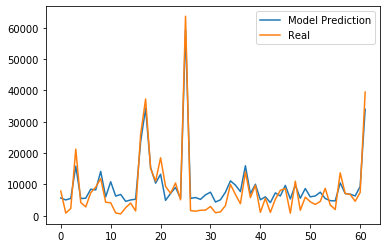

Prediction :  5676.959285714286       real : 7871.0
Prediction :  5045.8492857142855       real : 845.0
Prediction :  5541.721428571429       real : 2330.0
Prediction :  15819.798571428571       real : 21272.0
Prediction :  5496.642142857143       real : 4224.0
Prediction :  5586.800714285714       real : 2826.0
Prediction :  8471.875       real : 7320.0
Prediction :  8246.478571428572       real : 9125.0
Prediction :  14151.865       real : 11900.0
Prediction :  6037.5935714285715       real : 4300.0
Prediction :  10861.077142857142       real : 4150.0
Prediction :  6262.99       real : 900.0
Prediction :  6803.941428571428       real : 583.0
Prediction :  4595.056428571428       real : 2565.0
Prediction :  5045.8492857142855       real : 4047.0
Prediction :  5271.245714285715       real : 1520.0
Prediction :  23618.515       real : 25910.0
Prediction :  34257.22642857143       real : 37286.0
Prediction :  15369.005714285715       real : 15052.0
Prediction :  10410.284285714286       

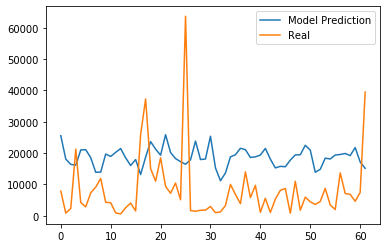

Prediction :  25556.924285714285       real : 7871.0
Prediction :  18073.762857142858       real : 845.0
Prediction :  16405.829285714288       real : 2330.0
Prediction :  16135.353571428572       real : 21272.0
Prediction :  21003.91642857143       real : 4224.0
Prediction :  21094.075       real : 2826.0
Prediction :  18524.555714285714       real : 7320.0
Prediction :  13881.389285714286       real : 9125.0
Prediction :  13926.468571428572       real : 11900.0
Prediction :  19696.617142857143       real : 4300.0
Prediction :  18930.269285714287       real : 4150.0
Prediction :  20237.568571428572       real : 900.0
Prediction :  21454.709285714285       real : 583.0
Prediction :  18479.47642857143       real : 2565.0
Prediction :  16045.195       real : 4047.0
Prediction :  17938.525       real : 1520.0
Prediction :  13160.120714285715       real : 25910.0
Prediction :  18704.87285714286       real : 37286.0
Prediction :  23663.594285714287       real : 15052.0
Prediction :  21274.3

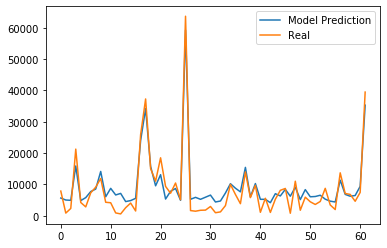

Prediction :  5648.131428571429       real : 7871.0
Prediction :  5019.151428571428       real : 845.0
Prediction :  4929.297142857143       real : 2330.0
Prediction :  15891.52       real : 21272.0
Prediction :  4839.442857142857       real : 4224.0
Prediction :  5782.912857142857       real : 2826.0
Prediction :  7714.78       real : 7320.0
Prediction :  8523.468571428572       real : 9125.0
Prediction :  14139.361428571428       real : 11900.0
Prediction :  6052.475714285714       real : 4300.0
Prediction :  8748.104285714286       real : 4150.0
Prediction :  6636.528571428571       real : 900.0
Prediction :  7130.727142857143       real : 583.0
Prediction :  4524.952857142857       real : 2565.0
Prediction :  4839.442857142857       real : 4047.0
Prediction :  5558.277142857143       real : 1520.0
Prediction :  24023.332857142857       real : 25910.0
Prediction :  34221.794285714284       real : 37286.0
Prediction :  15756.738571428572       real : 15052.0
Prediction :  9556.792857

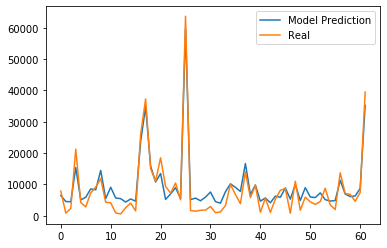

Prediction :  6443.307142857143       real : 7871.0
Prediction :  4549.977142857143       real : 845.0
Prediction :  4459.818571428572       real : 2330.0
Prediction :  15369.005714285715       real : 21272.0
Prediction :  5045.8492857142855       real : 4224.0
Prediction :  5902.355714285714       real : 2826.0
Prediction :  8562.033571428572       real : 7320.0
Prediction :  8291.557857142856       real : 9125.0
Prediction :  14467.42       real : 11900.0
Prediction :  5451.562857142857       real : 4300.0
Prediction :  9102.985       real : 4150.0
Prediction :  5676.959285714286       real : 900.0
Prediction :  5451.562857142857       real : 583.0
Prediction :  4369.66       real : 2565.0
Prediction :  5361.404285714286       real : 4047.0
Prediction :  4640.135714285714       real : 1520.0
Prediction :  23618.515       real : 25910.0
Prediction :  34843.25714285715       real : 37286.0
Prediction :  15864.877857142857       real : 15052.0
Prediction :  10770.918571428572       real

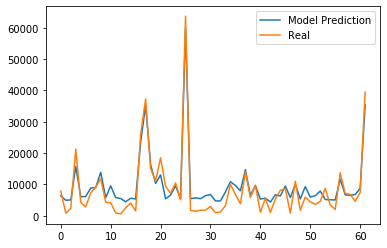

Prediction :  6353.148571428572       real : 7871.0
Prediction :  4955.690714285714       real : 845.0
Prediction :  5045.8492857142855       real : 2330.0
Prediction :  15729.64       real : 21272.0
Prediction :  6037.5935714285715       real : 4224.0
Prediction :  6172.831428571429       real : 2826.0
Prediction :  8832.509285714286       real : 7320.0
Prediction :  9012.826428571429       real : 9125.0
Prediction :  13881.389285714286       real : 11900.0
Prediction :  5767.117857142857       real : 4300.0
Prediction :  9553.777857142857       real : 4150.0
Prediction :  5812.197142857143       real : 900.0
Prediction :  5496.642142857143       real : 583.0
Prediction :  4459.818571428572       real : 2565.0
Prediction :  5586.800714285714       real : 4047.0
Prediction :  5361.404285714286       real : 1520.0
Prediction :  23528.356428571427       real : 25910.0
Prediction :  35203.89142857143       real : 37286.0
Prediction :  16360.75       real : 15052.0
Prediction :  10320.1257

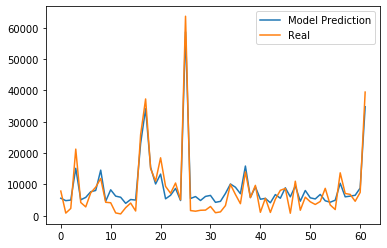

Prediction :  5586.800714285714       real : 7871.0
Prediction :  4820.452857142857       real : 845.0
Prediction :  5000.77       real : 2330.0
Prediction :  15143.609285714285       real : 21272.0
Prediction :  5090.928571428572       real : 4224.0
Prediction :  5857.276428571428       real : 2826.0
Prediction :  7660.447857142857       real : 7320.0
Prediction :  8066.161428571429       real : 9125.0
Prediction :  14557.578571428572       real : 11900.0
Prediction :  4640.135714285714       real : 4300.0
Prediction :  8291.557857142856       real : 4150.0
Prediction :  6262.99       real : 900.0
Prediction :  5902.355714285714       real : 583.0
Prediction :  3963.9464285714284       real : 2565.0
Prediction :  5181.087142857143       real : 4047.0
Prediction :  5000.77       real : 1520.0
Prediction :  23077.56357142857       real : 25910.0
Prediction :  34167.06785714286       real : 37286.0
Prediction :  15459.164285714285       real : 15052.0
Prediction :  10139.808571428572    

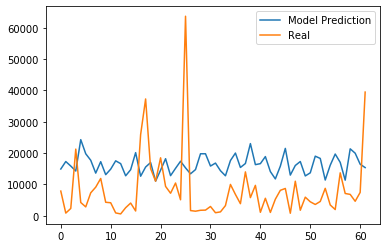

Prediction :  14918.212857142857       real : 7871.0
Prediction :  17307.415       real : 845.0
Prediction :  15864.877857142857       real : 2330.0
Prediction :  14287.102857142858       real : 21272.0
Prediction :  24294.704285714284       real : 4224.0
Prediction :  19786.775714285715       real : 2826.0
Prediction :  17713.128571428573       real : 7320.0
Prediction :  13610.913571428571       real : 9125.0
Prediction :  17262.335714285713       real : 11900.0
Prediction :  13115.041428571429       real : 4300.0
Prediction :  14873.13357142857       real : 4150.0
Prediction :  17532.81142857143       real : 900.0
Prediction :  16631.225714285712       real : 583.0
Prediction :  12754.407142857142       real : 2565.0
Prediction :  14692.816428571428       real : 4047.0
Prediction :  20147.41       real : 1520.0
Prediction :  12619.169285714286       real : 25910.0
Prediction :  15549.322857142857       real : 37286.0
Prediction :  16991.86       real : 15052.0
Prediction :  11041.39

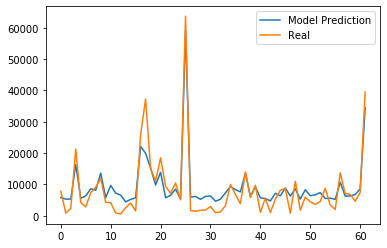

Prediction :  5812.197142857143       real : 7871.0
Prediction :  5316.325       real : 845.0
Prediction :  5316.325       real : 2330.0
Prediction :  16315.670714285714       real : 21272.0
Prediction :  5586.800714285714       real : 4224.0
Prediction :  6308.069285714286       real : 2826.0
Prediction :  8607.112857142856       real : 7320.0
Prediction :  8156.32       real : 9125.0
Prediction :  13610.913571428571       real : 11900.0
Prediction :  5767.117857142857       real : 4300.0
Prediction :  9689.015714285715       real : 4150.0
Prediction :  7209.655       real : 900.0
Prediction :  6578.545       real : 583.0
Prediction :  4414.739285714286       real : 2565.0
Prediction :  5226.166428571429       real : 4047.0
Prediction :  5722.038571428571       real : 1520.0
Prediction :  22130.89857142857       real : 25910.0
Prediction :  19922.01357142857       real : 37286.0
Prediction :  15233.767857142857       real : 15052.0
Prediction :  9824.253571428571       real : 11039.0


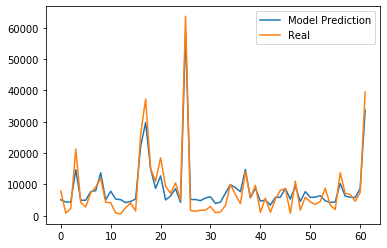

Prediction :  5090.928571428572       real : 7871.0
Prediction :  4369.66       real : 845.0
Prediction :  4369.66       real : 2330.0
Prediction :  14692.816428571428       real : 21272.0
Prediction :  4910.611428571428       real : 4224.0
Prediction :  4955.690714285714       real : 2826.0
Prediction :  7705.527142857143       real : 7320.0
Prediction :  8021.082142857143       real : 9125.0
Prediction :  13701.072142857143       real : 11900.0
Prediction :  5045.8492857142855       real : 4300.0
Prediction :  7840.765       real : 4150.0
Prediction :  5316.325       real : 900.0
Prediction :  5136.007857142858       real : 583.0
Prediction :  4189.342857142858       real : 2565.0
Prediction :  4549.977142857143       real : 4047.0
Prediction :  5361.404285714286       real : 1520.0
Prediction :  22130.89857142857       real : 25910.0
Prediction :  29749.297857142858       real : 37286.0
Prediction :  14963.292142857143       real : 15052.0
Prediction :  8742.350714285714       real 

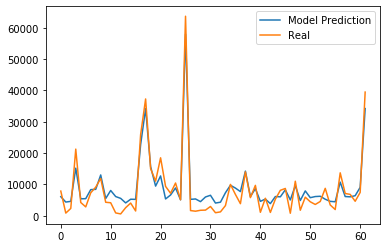

Prediction :  6082.6728571428575       real : 7871.0
Prediction :  4369.66       real : 845.0
Prediction :  4595.056428571428       real : 2330.0
Prediction :  15188.68857142857       real : 21272.0
Prediction :  5406.483571428572       real : 4224.0
Prediction :  5451.562857142857       real : 2826.0
Prediction :  8336.637142857144       real : 7320.0
Prediction :  8426.795714285714       real : 9125.0
Prediction :  13024.882857142857       real : 11900.0
Prediction :  5496.642142857143       real : 4300.0
Prediction :  8066.161428571429       real : 4150.0
Prediction :  6127.752142857143       real : 900.0
Prediction :  5541.721428571429       real : 583.0
Prediction :  4099.184285714286       real : 2565.0
Prediction :  5271.245714285715       real : 4047.0
Prediction :  5226.166428571429       real : 1520.0
Prediction :  22716.929285714286       real : 25910.0
Prediction :  34212.147142857146       real : 37286.0
Prediction :  15684.560714285713       real : 15052.0
Prediction :  9

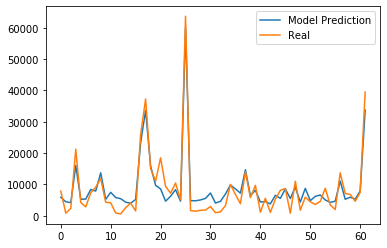

Prediction :  5902.355714285714       real : 7871.0
Prediction :  4459.818571428572       real : 845.0
Prediction :  4189.342857142858       real : 2330.0
Prediction :  16045.195       real : 21272.0
Prediction :  5271.245714285715       real : 4224.0
Prediction :  5316.325       real : 2826.0
Prediction :  8381.716428571428       real : 7320.0
Prediction :  7885.844285714285       real : 9125.0
Prediction :  13701.072142857143       real : 11900.0
Prediction :  5226.166428571429       real : 4300.0
Prediction :  7480.130714285714       real : 4150.0
Prediction :  5812.197142857143       real : 900.0
Prediction :  5451.562857142857       real : 583.0
Prediction :  4324.580714285714       real : 2565.0
Prediction :  4009.0257142857145       real : 4047.0
Prediction :  5181.087142857143       real : 1520.0
Prediction :  23348.039285714287       real : 25910.0
Prediction :  33626.116428571426       real : 37286.0
Prediction :  15909.957142857143       real : 15052.0
Prediction :  9689.015

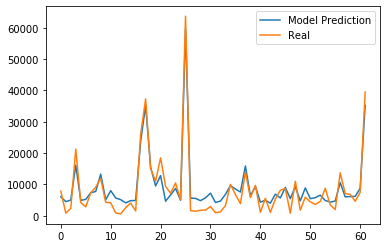

Prediction :  6037.5935714285715       real : 7871.0
Prediction :  4504.897857142857       real : 845.0
Prediction :  5000.77       real : 2330.0
Prediction :  16135.353571428572       real : 21272.0
Prediction :  4910.611428571428       real : 4224.0
Prediction :  5226.166428571429       real : 2826.0
Prediction :  7344.892857142857       real : 7320.0
Prediction :  7750.606428571428       real : 9125.0
Prediction :  13295.358571428571       real : 11900.0
Prediction :  5090.928571428572       real : 4300.0
Prediction :  8021.082142857143       real : 4150.0
Prediction :  5676.959285714286       real : 900.0
Prediction :  5136.007857142858       real : 583.0
Prediction :  4099.184285714286       real : 2565.0
Prediction :  4820.452857142857       real : 4047.0
Prediction :  4865.532142857143       real : 1520.0
Prediction :  23663.594285714287       real : 25910.0
Prediction :  35248.970714285715       real : 37286.0
Prediction :  15594.402142857143       real : 15052.0
Prediction :  

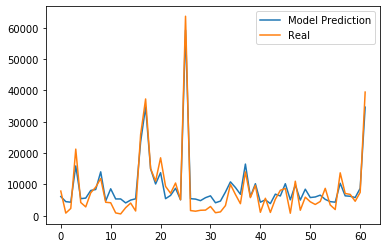

Prediction :  6127.752142857143       real : 7871.0
Prediction :  4504.897857142857       real : 845.0
Prediction :  4324.580714285714       real : 2330.0
Prediction :  15909.957142857143       real : 21272.0
Prediction :  5451.562857142857       real : 4224.0
Prediction :  5631.88       real : 2826.0
Prediction :  8066.161428571429       real : 7320.0
Prediction :  8381.716428571428       real : 9125.0
Prediction :  14016.627142857144       real : 11900.0
Prediction :  4730.294285714286       real : 4300.0
Prediction :  8607.112857142856       real : 4150.0
Prediction :  5361.404285714286       real : 900.0
Prediction :  5361.404285714286       real : 583.0
Prediction :  4099.184285714286       real : 2565.0
Prediction :  5000.77       real : 4047.0
Prediction :  5406.483571428572       real : 1520.0
Prediction :  23573.435714285715       real : 25910.0
Prediction :  34753.09857142857       real : 37286.0
Prediction :  14963.292142857143       real : 15052.0
Prediction :  10139.808571

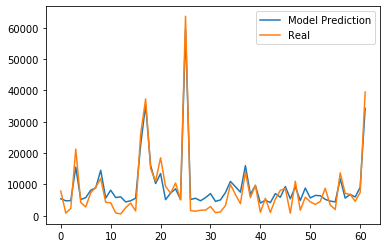

Prediction :  5406.483571428572       real : 7871.0
Prediction :  4775.373571428571       real : 845.0
Prediction :  4820.452857142857       real : 2330.0
Prediction :  15504.243571428571       real : 21272.0
Prediction :  5181.087142857143       real : 4224.0
Prediction :  5767.117857142857       real : 2826.0
Prediction :  8156.32       real : 7320.0
Prediction :  8877.588571428572       real : 9125.0
Prediction :  14512.499285714286       real : 11900.0
Prediction :  5631.88       real : 4300.0
Prediction :  8156.32       real : 4150.0
Prediction :  5812.197142857143       real : 900.0
Prediction :  6037.5935714285715       real : 583.0
Prediction :  4414.739285714286       real : 2565.0
Prediction :  4775.373571428571       real : 4047.0
Prediction :  5586.800714285714       real : 1520.0
Prediction :  22536.612142857142       real : 25910.0
Prediction :  35429.28785714286       real : 37286.0
Prediction :  16090.274285714286       real : 15052.0
Prediction :  10275.046428571428   

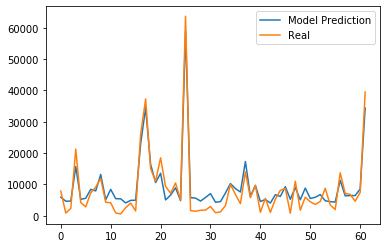

Prediction :  5902.355714285714       real : 7871.0
Prediction :  4640.135714285714       real : 845.0
Prediction :  4685.215       real : 2330.0
Prediction :  15684.560714285713       real : 21272.0
Prediction :  5226.166428571429       real : 4224.0
Prediction :  5586.800714285714       real : 2826.0
Prediction :  8426.795714285714       real : 7320.0
Prediction :  7930.923571428571       real : 9125.0
Prediction :  13205.2       real : 11900.0
Prediction :  5090.928571428572       real : 4300.0
Prediction :  8426.795714285714       real : 4150.0
Prediction :  5451.562857142857       real : 900.0
Prediction :  5406.483571428572       real : 583.0
Prediction :  4099.184285714286       real : 2565.0
Prediction :  4910.611428571428       real : 4047.0
Prediction :  4955.690714285714       real : 1520.0
Prediction :  22942.325714285715       real : 25910.0
Prediction :  34482.62285714286       real : 37286.0
Prediction :  16405.829285714288       real : 15052.0
Prediction :  10590.601428

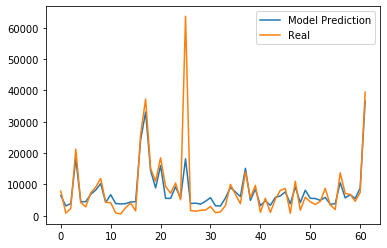

Prediction :  6417.4       real : 7871.0
Prediction :  3166.805714285714       real : 845.0
Prediction :  3861.3771428571426       real : 2330.0
Prediction :  18197.33142857143       real : 21272.0
Prediction :  4500.382857142857       real : 4224.0
Prediction :  4472.6       real : 2826.0
Prediction :  6834.142857142857       real : 7320.0
Prediction :  8195.502857142857       real : 9125.0
Prediction :  10279.217142857144       real : 11900.0
Prediction :  4250.337142857143       real : 4300.0
Prediction :  6723.011428571429       real : 4150.0
Prediction :  3889.16       real : 900.0
Prediction :  3778.0285714285715       real : 583.0
Prediction :  3861.3771428571426       real : 2565.0
Prediction :  4389.251428571429       real : 4047.0
Prediction :  4472.6       real : 1520.0
Prediction :  24226.211428571427       real : 25910.0
Prediction :  33088.94285714286       real : 37286.0
Prediction :  14418.862857142858       real : 15052.0
Prediction :  8890.074285714285       real : 11

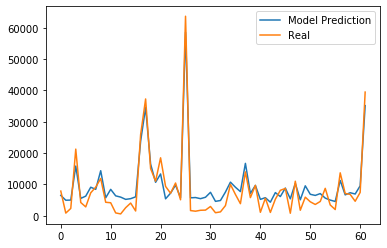

Prediction :  6488.386428571429       real : 7871.0
Prediction :  4955.690714285714       real : 845.0
Prediction :  5000.77       real : 2330.0
Prediction :  15864.877857142857       real : 21272.0
Prediction :  5541.721428571429       real : 4224.0
Prediction :  6262.99       real : 2826.0
Prediction :  9102.985       real : 7320.0
Prediction :  8426.795714285714       real : 9125.0
Prediction :  14377.261428571428       real : 11900.0
Prediction :  5722.038571428571       real : 4300.0
Prediction :  8426.795714285714       real : 4150.0
Prediction :  6353.148571428572       real : 900.0
Prediction :  5947.435       real : 583.0
Prediction :  5226.166428571429       real : 2565.0
Prediction :  5451.562857142857       real : 4047.0
Prediction :  6037.5935714285715       real : 1520.0
Prediction :  23798.832142857143       real : 25910.0
Prediction :  34572.78142857143       real : 37286.0
Prediction :  16495.987857142856       real : 15052.0
Prediction :  10680.76       real : 11039.0

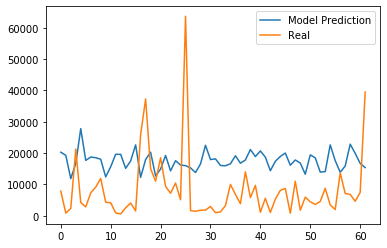

Prediction :  20282.647857142856       real : 7871.0
Prediction :  19290.90357142857       real : 845.0
Prediction :  11852.82142857143       real : 2330.0
Prediction :  16676.305       real : 21272.0
Prediction :  27810.88857142857       real : 4224.0
Prediction :  17668.049285714285       real : 2826.0
Prediction :  18749.952142857142       real : 7320.0
Prediction :  18524.555714285714       real : 9125.0
Prediction :  18028.68357142857       real : 11900.0
Prediction :  12393.772857142858       real : 4300.0
Prediction :  15639.48142857143       real : 4150.0
Prediction :  19606.45857142857       real : 900.0
Prediction :  19606.45857142857       real : 583.0
Prediction :  15143.609285714285       real : 2565.0
Prediction :  17487.73214285714       real : 4047.0
Prediction :  22626.770714285714       real : 1520.0
Prediction :  12258.535       real : 25910.0
Prediction :  17938.525       real : 37286.0
Prediction :  20282.647857142856       real : 15052.0
Prediction :  12709.327857

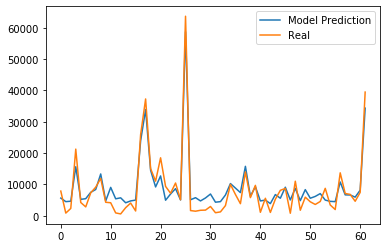

Prediction :  5631.88       real : 7871.0
Prediction :  4504.897857142857       real : 845.0
Prediction :  4640.135714285714       real : 2330.0
Prediction :  15639.48142857143       real : 21272.0
Prediction :  5226.166428571429       real : 4224.0
Prediction :  5451.562857142857       real : 2826.0
Prediction :  7480.130714285714       real : 7320.0
Prediction :  8381.716428571428       real : 9125.0
Prediction :  13340.437857142857       real : 11900.0
Prediction :  4730.294285714286       real : 4300.0
Prediction :  9057.905714285715       real : 4150.0
Prediction :  5406.483571428572       real : 900.0
Prediction :  5722.038571428571       real : 583.0
Prediction :  4144.263571428572       real : 2565.0
Prediction :  4730.294285714286       real : 4047.0
Prediction :  5000.77       real : 1520.0
Prediction :  23934.07       real : 25910.0
Prediction :  33896.592142857146       real : 37286.0
Prediction :  14512.499285714286       real : 15052.0
Prediction :  9193.14357142857      

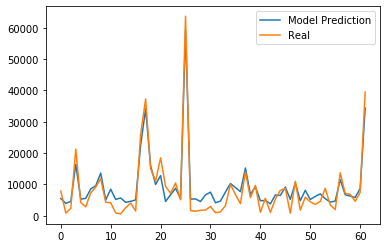

Prediction :  5496.642142857143       real : 7871.0
Prediction :  3963.9464285714284       real : 845.0
Prediction :  4549.977142857143       real : 2330.0
Prediction :  16405.829285714288       real : 21272.0
Prediction :  5316.325       real : 4224.0
Prediction :  5541.721428571429       real : 2826.0
Prediction :  8562.033571428572       real : 7320.0
Prediction :  9553.777857142857       real : 9125.0
Prediction :  13610.913571428571       real : 11900.0
Prediction :  5045.8492857142855       real : 4300.0
Prediction :  8471.875       real : 4150.0
Prediction :  5226.166428571429       real : 900.0
Prediction :  5676.959285714286       real : 583.0
Prediction :  4279.501428571429       real : 2565.0
Prediction :  4595.056428571428       real : 4047.0
Prediction :  5045.8492857142855       real : 1520.0
Prediction :  22491.532857142858       real : 25910.0
Prediction :  34121.98857142857       real : 37286.0
Prediction :  15955.036428571428       real : 15052.0
Prediction :  10004.5

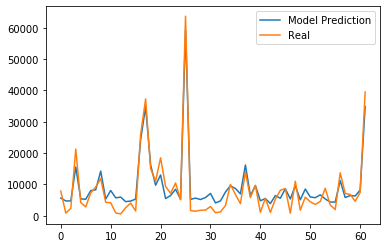

Prediction :  5631.88       real : 7871.0
Prediction :  4730.294285714286       real : 845.0
Prediction :  4730.294285714286       real : 2330.0
Prediction :  15549.322857142857       real : 21272.0
Prediction :  5361.404285714286       real : 4224.0
Prediction :  5271.245714285715       real : 2826.0
Prediction :  8021.082142857143       real : 7320.0
Prediction :  8291.557857142856       real : 9125.0
Prediction :  14242.023571428572       real : 11900.0
Prediction :  5316.325       real : 4300.0
Prediction :  8066.161428571429       real : 4150.0
Prediction :  5722.038571428571       real : 900.0
Prediction :  5947.435       real : 583.0
Prediction :  4504.897857142857       real : 2565.0
Prediction :  4685.215       real : 4047.0
Prediction :  5316.325       real : 1520.0
Prediction :  24294.704285714284       real : 25910.0
Prediction :  34798.17785714286       real : 37286.0
Prediction :  16270.591428571428       real : 15052.0
Prediction :  9734.095       real : 11039.0
Predicti

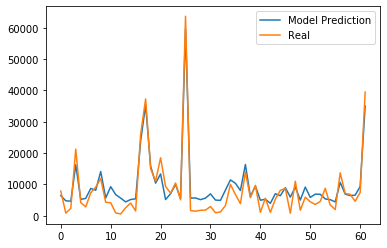

Prediction :  6398.227857142857       real : 7871.0
Prediction :  4775.373571428571       real : 845.0
Prediction :  4640.135714285714       real : 2330.0
Prediction :  16270.591428571428       real : 21272.0
Prediction :  5226.166428571429       real : 4224.0
Prediction :  5541.721428571429       real : 2826.0
Prediction :  8697.271428571428       real : 7320.0
Prediction :  8156.32       real : 9125.0
Prediction :  14106.785714285714       real : 11900.0
Prediction :  5676.959285714286       real : 4300.0
Prediction :  9283.302142857143       real : 4150.0
Prediction :  6758.862142857143       real : 900.0
Prediction :  5631.88       real : 583.0
Prediction :  4414.739285714286       real : 2565.0
Prediction :  5181.087142857143       real : 4047.0
Prediction :  5406.483571428572       real : 1520.0
Prediction :  23843.911428571428       real : 25910.0
Prediction :  35384.20857142857       real : 37286.0
Prediction :  15864.877857142857       real : 15052.0
Prediction :  10410.284285

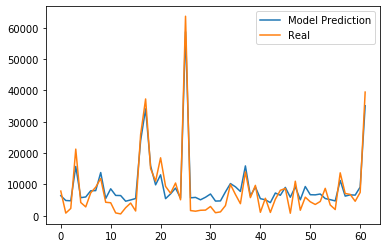

Prediction :  6398.227857142857       real : 7871.0
Prediction :  4865.532142857143       real : 845.0
Prediction :  4775.373571428571       real : 2330.0
Prediction :  15729.64       real : 21272.0
Prediction :  5767.117857142857       real : 4224.0
Prediction :  5992.5142857142855       real : 2826.0
Prediction :  7976.0028571428575       real : 7320.0
Prediction :  8021.082142857143       real : 9125.0
Prediction :  13791.230714285713       real : 11900.0
Prediction :  5496.642142857143       real : 4300.0
Prediction :  8607.112857142856       real : 4150.0
Prediction :  6488.386428571429       real : 900.0
Prediction :  6443.307142857143       real : 583.0
Prediction :  4640.135714285714       real : 2565.0
Prediction :  5045.8492857142855       real : 4047.0
Prediction :  5496.642142857143       real : 1520.0
Prediction :  23979.149285714284       real : 25910.0
Prediction :  34121.98857142857       real : 37286.0
Prediction :  15909.957142857143       real : 15052.0
Prediction : 

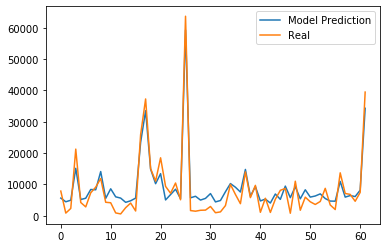

Prediction :  5631.88       real : 7871.0
Prediction :  4459.818571428572       real : 845.0
Prediction :  4955.690714285714       real : 2330.0
Prediction :  15143.609285714285       real : 21272.0
Prediction :  5181.087142857143       real : 4224.0
Prediction :  5586.800714285714       real : 2826.0
Prediction :  8381.716428571428       real : 7320.0
Prediction :  8291.557857142856       real : 9125.0
Prediction :  14106.785714285714       real : 11900.0
Prediction :  5541.721428571429       real : 4300.0
Prediction :  8607.112857142856       real : 4150.0
Prediction :  6037.5935714285715       real : 900.0
Prediction :  5631.88       real : 583.0
Prediction :  4279.501428571429       real : 2565.0
Prediction :  4775.373571428571       real : 4047.0
Prediction :  5631.88       real : 1520.0
Prediction :  23438.197857142855       real : 25910.0
Prediction :  33535.95785714286       real : 37286.0
Prediction :  14873.13357142857       real : 15052.0
Prediction :  10229.967142857144    

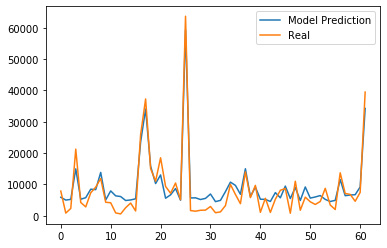

Prediction :  5902.355714285714       real : 7871.0
Prediction :  5000.77       real : 845.0
Prediction :  5226.166428571429       real : 2330.0
Prediction :  14963.292142857143       real : 21272.0
Prediction :  5271.245714285715       real : 4224.0
Prediction :  5767.117857142857       real : 2826.0
Prediction :  8471.875       real : 7320.0
Prediction :  8336.637142857144       real : 9125.0
Prediction :  13836.31       real : 11900.0
Prediction :  5045.8492857142855       real : 4300.0
Prediction :  7930.923571428571       real : 4150.0
Prediction :  6353.148571428572       real : 900.0
Prediction :  6127.752142857143       real : 583.0
Prediction :  4865.532142857143       real : 2565.0
Prediction :  5045.8492857142855       real : 4047.0
Prediction :  5406.483571428572       real : 1520.0
Prediction :  23573.435714285715       real : 25910.0
Prediction :  34076.90928571428       real : 37286.0
Prediction :  15819.798571428571       real : 15052.0
Prediction :  10275.046428571428 

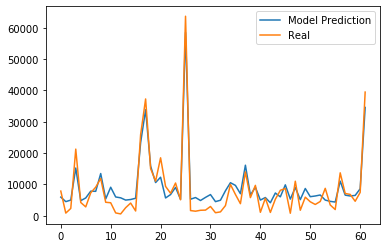

Prediction :  5947.435       real : 7871.0
Prediction :  4504.897857142857       real : 845.0
Prediction :  5000.77       real : 2330.0
Prediction :  15233.767857142857       real : 21272.0
Prediction :  4820.452857142857       real : 4224.0
Prediction :  5676.959285714286       real : 2826.0
Prediction :  7840.765       real : 7320.0
Prediction :  7795.685714285714       real : 9125.0
Prediction :  13475.675714285715       real : 11900.0
Prediction :  5361.404285714286       real : 4300.0
Prediction :  9102.985       real : 4150.0
Prediction :  5992.5142857142855       real : 900.0
Prediction :  5722.038571428571       real : 583.0
Prediction :  5000.77       real : 2565.0
Prediction :  5181.087142857143       real : 4047.0
Prediction :  5586.800714285714       real : 1520.0
Prediction :  23348.039285714287       real : 25910.0
Prediction :  33851.51285714286       real : 37286.0
Prediction :  15864.877857142857       real : 15052.0
Prediction :  10590.601428571428       real : 11039.

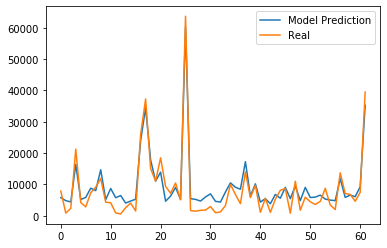

Prediction :  5767.117857142857       real : 7871.0
Prediction :  4820.452857142857       real : 845.0
Prediction :  4414.739285714286       real : 2330.0
Prediction :  16405.829285714288       real : 21272.0
Prediction :  5181.087142857143       real : 4224.0
Prediction :  5857.276428571428       real : 2826.0
Prediction :  8787.43       real : 7320.0
Prediction :  8021.082142857143       real : 9125.0
Prediction :  14692.816428571428       real : 11900.0
Prediction :  5136.007857142858       real : 4300.0
Prediction :  8697.271428571428       real : 4150.0
Prediction :  5767.117857142857       real : 900.0
Prediction :  6443.307142857143       real : 583.0
Prediction :  4054.105       real : 2565.0
Prediction :  4685.215       real : 4047.0
Prediction :  5271.245714285715       real : 1520.0
Prediction :  23979.149285714284       real : 25910.0
Prediction :  34437.54357142857       real : 37286.0
Prediction :  17848.36642857143       real : 15052.0
Prediction :  11041.394285714287   

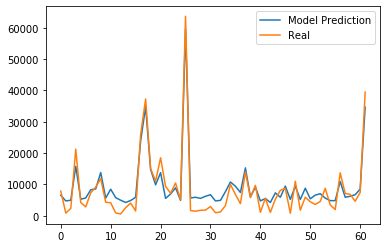

Prediction :  6533.465714285714       real : 7871.0
Prediction :  4730.294285714286       real : 845.0
Prediction :  4955.690714285714       real : 2330.0
Prediction :  15774.719285714285       real : 21272.0
Prediction :  5271.245714285715       real : 4224.0
Prediction :  5676.959285714286       real : 2826.0
Prediction :  8291.557857142856       real : 7320.0
Prediction :  8562.033571428572       real : 9125.0
Prediction :  13791.230714285713       real : 11900.0
Prediction :  5631.88       real : 4300.0
Prediction :  8471.875       real : 4150.0
Prediction :  5767.117857142857       real : 900.0
Prediction :  4955.690714285714       real : 583.0
Prediction :  4234.422142857143       real : 2565.0
Prediction :  4865.532142857143       real : 4047.0
Prediction :  5902.355714285714       real : 1520.0
Prediction :  23843.911428571428       real : 25910.0
Prediction :  34843.25714285715       real : 37286.0
Prediction :  14782.975       real : 15052.0
Prediction :  9869.332857142857   

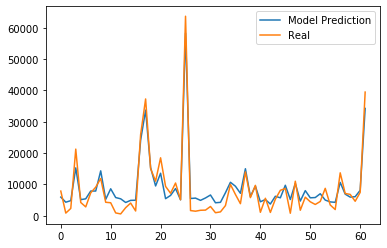

Prediction :  5947.435       real : 7871.0
Prediction :  4324.580714285714       real : 845.0
Prediction :  4820.452857142857       real : 2330.0
Prediction :  15278.847142857143       real : 21272.0
Prediction :  5136.007857142858       real : 4224.0
Prediction :  5406.483571428572       real : 2826.0
Prediction :  7885.844285714285       real : 7320.0
Prediction :  7885.844285714285       real : 9125.0
Prediction :  14332.182142857142       real : 11900.0
Prediction :  5226.166428571429       real : 4300.0
Prediction :  8607.112857142856       real : 4150.0
Prediction :  5812.197142857143       real : 900.0
Prediction :  5406.483571428572       real : 583.0
Prediction :  4234.422142857143       real : 2565.0
Prediction :  4910.611428571428       real : 4047.0
Prediction :  4955.690714285714       real : 1520.0
Prediction :  24114.387142857144       real : 25910.0
Prediction :  33716.275       real : 37286.0
Prediction :  15369.005714285715       real : 15052.0
Prediction :  9508.6985

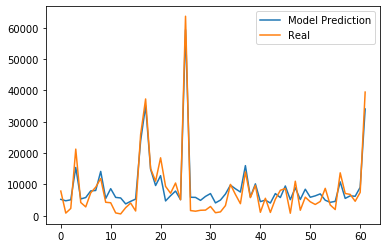

Prediction :  5226.166428571429       real : 7871.0
Prediction :  4775.373571428571       real : 845.0
Prediction :  5090.928571428572       real : 2330.0
Prediction :  15414.085       real : 21272.0
Prediction :  5361.404285714286       real : 4224.0
Prediction :  5812.197142857143       real : 2826.0
Prediction :  7930.923571428571       real : 7320.0
Prediction :  8066.161428571429       real : 9125.0
Prediction :  14151.865       real : 11900.0
Prediction :  5496.642142857143       real : 4300.0
Prediction :  8652.192142857144       real : 4150.0
Prediction :  5857.276428571428       real : 900.0
Prediction :  5676.959285714286       real : 583.0
Prediction :  3783.6292857142857       real : 2565.0
Prediction :  4595.056428571428       real : 4047.0
Prediction :  5316.325       real : 1520.0
Prediction :  23888.990714285716       real : 25910.0
Prediction :  35113.73285714286       real : 37286.0
Prediction :  14828.054285714286       real : 15052.0
Prediction :  9643.93642857143  

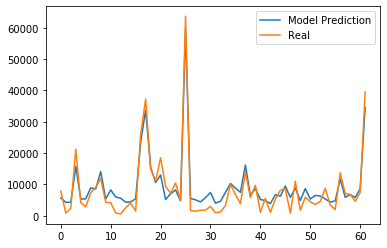

Prediction :  5676.959285714286       real : 7871.0
Prediction :  4279.501428571429       real : 845.0
Prediction :  4324.580714285714       real : 2330.0
Prediction :  15729.64       real : 21272.0
Prediction :  5316.325       real : 4224.0
Prediction :  5406.483571428572       real : 2826.0
Prediction :  8877.588571428572       real : 7320.0
Prediction :  8562.033571428572       real : 9125.0
Prediction :  14106.785714285714       real : 11900.0
Prediction :  5361.404285714286       real : 4300.0
Prediction :  8246.478571428572       real : 4150.0
Prediction :  5992.5142857142855       real : 900.0
Prediction :  5586.800714285714       real : 583.0
Prediction :  4324.580714285714       real : 2565.0
Prediction :  4414.739285714286       real : 4047.0
Prediction :  5406.483571428572       real : 1520.0
Prediction :  23348.039285714287       real : 25910.0
Prediction :  33716.275       real : 37286.0
Prediction :  15549.322857142857       real : 15052.0
Prediction :  10590.601428571428

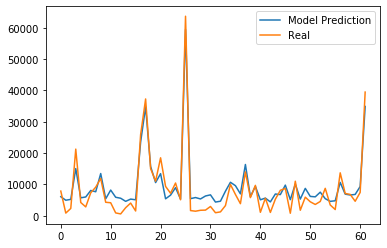

Prediction :  6082.6728571428575       real : 7871.0
Prediction :  4955.690714285714       real : 845.0
Prediction :  5226.166428571429       real : 2330.0
Prediction :  15053.450714285715       real : 21272.0
Prediction :  5722.038571428571       real : 4224.0
Prediction :  5992.5142857142855       real : 2826.0
Prediction :  8066.161428571429       real : 7320.0
Prediction :  7660.447857142857       real : 9125.0
Prediction :  13475.675714285715       real : 11900.0
Prediction :  5406.483571428572       real : 4300.0
Prediction :  8201.399285714286       real : 4150.0
Prediction :  5902.355714285714       real : 900.0
Prediction :  5586.800714285714       real : 583.0
Prediction :  4595.056428571428       real : 2565.0
Prediction :  5316.325       real : 4047.0
Prediction :  5090.928571428572       real : 1520.0
Prediction :  23528.356428571427       real : 25910.0
Prediction :  34798.17785714286       real : 37286.0
Prediction :  15729.64       real : 15052.0
Prediction :  10590.601

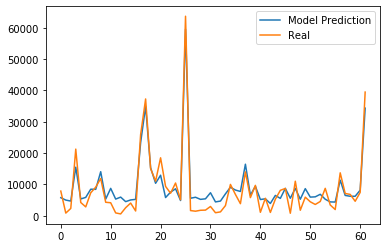

Prediction :  5767.117857142857       real : 7871.0
Prediction :  5000.77       real : 845.0
Prediction :  4685.215       real : 2330.0
Prediction :  15504.243571428571       real : 21272.0
Prediction :  5361.404285714286       real : 4224.0
Prediction :  5857.276428571428       real : 2826.0
Prediction :  8471.875       real : 7320.0
Prediction :  8426.795714285714       real : 9125.0
Prediction :  14061.706428571428       real : 11900.0
Prediction :  5316.325       real : 4300.0
Prediction :  8742.350714285714       real : 4150.0
Prediction :  5316.325       real : 900.0
Prediction :  5947.435       real : 583.0
Prediction :  4504.897857142857       real : 2565.0
Prediction :  5045.8492857142855       real : 4047.0
Prediction :  5226.166428571429       real : 1520.0
Prediction :  23348.039285714287       real : 25910.0
Prediction :  34933.415714285715       real : 37286.0
Prediction :  15323.926428571429       real : 15052.0
Prediction :  10365.205       real : 11039.0
Prediction :  

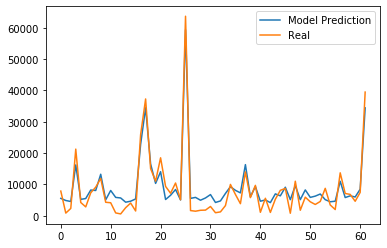

Prediction :  5541.721428571429       real : 7871.0
Prediction :  4865.532142857143       real : 845.0
Prediction :  4549.977142857143       real : 2330.0
Prediction :  16225.512142857142       real : 21272.0
Prediction :  5226.166428571429       real : 4224.0
Prediction :  5496.642142857143       real : 2826.0
Prediction :  8201.399285714286       real : 7320.0
Prediction :  8066.161428571429       real : 9125.0
Prediction :  13250.279285714285       real : 11900.0
Prediction :  5090.928571428572       real : 4300.0
Prediction :  8066.161428571429       real : 4150.0
Prediction :  5857.276428571428       real : 900.0
Prediction :  5676.959285714286       real : 583.0
Prediction :  4324.580714285714       real : 2565.0
Prediction :  4640.135714285714       real : 4047.0
Prediction :  5361.404285714286       real : 1520.0
Prediction :  22807.08785714286       real : 25910.0
Prediction :  34482.62285714286       real : 37286.0
Prediction :  16541.067142857144       real : 15052.0
Predict

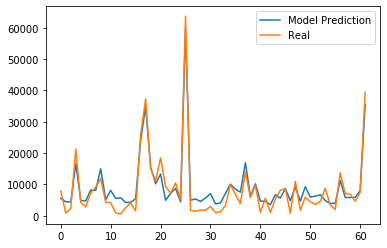

Prediction :  5541.721428571429       real : 7871.0
Prediction :  4459.818571428572       real : 845.0
Prediction :  4414.739285714286       real : 2330.0
Prediction :  16631.225714285712       real : 21272.0
Prediction :  4865.532142857143       real : 4224.0
Prediction :  4730.294285714286       real : 2826.0
Prediction :  8201.399285714286       real : 7320.0
Prediction :  8111.240714285715       real : 9125.0
Prediction :  15008.371428571429       real : 11900.0
Prediction :  5090.928571428572       real : 4300.0
Prediction :  8111.240714285715       real : 4150.0
Prediction :  5541.721428571429       real : 900.0
Prediction :  5722.038571428571       real : 583.0
Prediction :  4234.422142857143       real : 2565.0
Prediction :  4279.501428571429       real : 4047.0
Prediction :  5406.483571428572       real : 1520.0
Prediction :  23979.149285714284       real : 25910.0
Prediction :  34888.33642857143       real : 37286.0
Prediction :  15594.402142857143       real : 15052.0
Predic

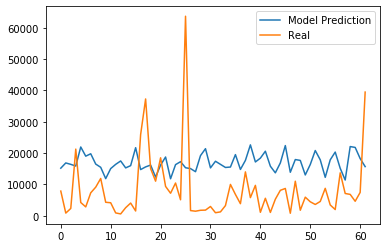

Prediction :  15188.68857142857       real : 7871.0
Prediction :  16856.622142857144       real : 845.0
Prediction :  16405.829285714288       real : 2330.0
Prediction :  15864.877857142857       real : 21272.0
Prediction :  21950.58142857143       real : 4224.0
Prediction :  19020.42785714286       real : 2826.0
Prediction :  19786.775714285715       real : 7320.0
Prediction :  16495.987857142856       real : 9125.0
Prediction :  15459.164285714285       real : 11900.0
Prediction :  11852.82142857143       real : 4300.0
Prediction :  15053.450714285715       real : 4150.0
Prediction :  16405.829285714288       real : 900.0
Prediction :  17487.73214285714       real : 583.0
Prediction :  15278.847142857143       real : 2565.0
Prediction :  16000.115714285714       real : 4047.0
Prediction :  21725.185       real : 1520.0
Prediction :  14737.895714285714       real : 25910.0
Prediction :  15594.402142857143       real : 37286.0
Prediction :  16180.432857142858       real : 15052.0
Predi

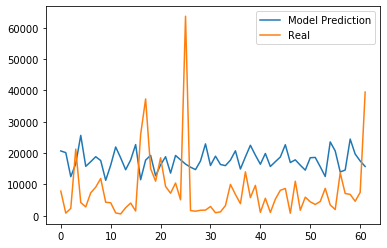

Prediction :  20688.36142857143       real : 7871.0
Prediction :  20147.41       real : 845.0
Prediction :  12483.931428571428       real : 2330.0
Prediction :  16586.14642857143       real : 21272.0
Prediction :  25647.082857142857       real : 4224.0
Prediction :  15774.719285714285       real : 2826.0
Prediction :  17262.335714285713       real : 7320.0
Prediction :  18840.110714285714       real : 9125.0
Prediction :  17622.97       real : 11900.0
Prediction :  11311.87       real : 4300.0
Prediction :  16135.353571428572       real : 4150.0
Prediction :  21950.58142857143       real : 900.0
Prediction :  18479.47642857143       real : 583.0
Prediction :  14692.816428571428       real : 2565.0
Prediction :  17803.28714285714       real : 4047.0
Prediction :  22716.929285714286       real : 1520.0
Prediction :  11492.187142857143       real : 25910.0
Prediction :  17758.207857142857       real : 37286.0
Prediction :  19290.90357142857       real : 15052.0
Prediction :  12754.4071428

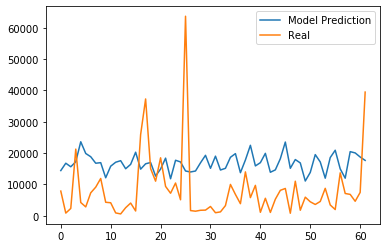

Prediction :  14422.340714285714       real : 7871.0
Prediction :  16766.463571428572       real : 845.0
Prediction :  15639.48142857143       real : 2330.0
Prediction :  17217.25642857143       real : 21272.0
Prediction :  23618.515       real : 4224.0
Prediction :  19876.934285714287       real : 2826.0
Prediction :  18840.110714285714       real : 7320.0
Prediction :  16766.463571428572       real : 9125.0
Prediction :  16946.780714285713       real : 11900.0
Prediction :  12123.297142857144       real : 4300.0
Prediction :  15819.798571428571       real : 4150.0
Prediction :  17082.018571428573       real : 900.0
Prediction :  17577.890714285713       real : 583.0
Prediction :  15008.371428571429       real : 2565.0
Prediction :  16405.829285714288       real : 4047.0
Prediction :  20282.647857142856       real : 1520.0
Prediction :  14873.13357142857       real : 25910.0
Prediction :  16586.14642857143       real : 37286.0
Prediction :  16991.86       real : 15052.0
Prediction :  

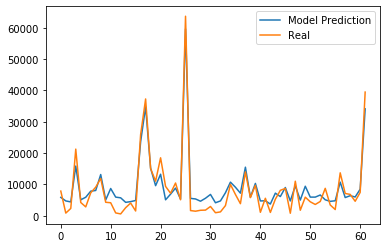

Prediction :  5857.276428571428       real : 7871.0
Prediction :  4730.294285714286       real : 845.0
Prediction :  4414.739285714286       real : 2330.0
Prediction :  15864.877857142857       real : 21272.0
Prediction :  5090.928571428572       real : 4224.0
Prediction :  5902.355714285714       real : 2826.0
Prediction :  7840.765       real : 7320.0
Prediction :  8066.161428571429       real : 9125.0
Prediction :  13160.120714285715       real : 11900.0
Prediction :  5045.8492857142855       real : 4300.0
Prediction :  8697.271428571428       real : 4150.0
Prediction :  5947.435       real : 900.0
Prediction :  5722.038571428571       real : 583.0
Prediction :  4279.501428571429       real : 2565.0
Prediction :  4504.897857142857       real : 4047.0
Prediction :  4865.532142857143       real : 1520.0
Prediction :  23618.515       real : 25910.0
Prediction :  34798.17785714286       real : 37286.0
Prediction :  15188.68857142857       real : 15052.0
Prediction :  9598.857142857143  

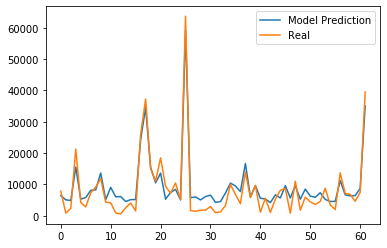

Prediction :  6398.227857142857       real : 7871.0
Prediction :  5090.928571428572       real : 845.0
Prediction :  4865.532142857143       real : 2330.0
Prediction :  15504.243571428571       real : 21272.0
Prediction :  5316.325       real : 4224.0
Prediction :  5812.197142857143       real : 2826.0
Prediction :  8111.240714285715       real : 7320.0
Prediction :  8291.557857142856       real : 9125.0
Prediction :  13655.992857142857       real : 11900.0
Prediction :  5136.007857142858       real : 4300.0
Prediction :  9057.905714285715       real : 4150.0
Prediction :  6037.5935714285715       real : 900.0
Prediction :  6127.752142857143       real : 583.0
Prediction :  4549.977142857143       real : 2565.0
Prediction :  5136.007857142858       real : 4047.0
Prediction :  5181.087142857143       real : 1520.0
Prediction :  24204.545714285716       real : 25910.0
Prediction :  34572.78142857143       real : 37286.0
Prediction :  15459.164285714285       real : 15052.0
Prediction :  

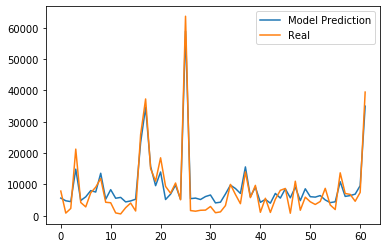

Prediction :  5631.88       real : 7871.0
Prediction :  4775.373571428571       real : 845.0
Prediction :  4504.897857142857       real : 2330.0
Prediction :  14873.13357142857       real : 21272.0
Prediction :  4865.532142857143       real : 4224.0
Prediction :  6037.5935714285715       real : 2826.0
Prediction :  8021.082142857143       real : 7320.0
Prediction :  7570.289285714286       real : 9125.0
Prediction :  13565.834285714285       real : 11900.0
Prediction :  5271.245714285715       real : 4300.0
Prediction :  8336.637142857144       real : 4150.0
Prediction :  5586.800714285714       real : 900.0
Prediction :  5857.276428571428       real : 583.0
Prediction :  4414.739285714286       real : 2565.0
Prediction :  4730.294285714286       real : 4047.0
Prediction :  5271.245714285715       real : 1520.0
Prediction :  23348.039285714287       real : 25910.0
Prediction :  34617.860714285714       real : 37286.0
Prediction :  15729.64       real : 15052.0
Prediction :  9598.857142

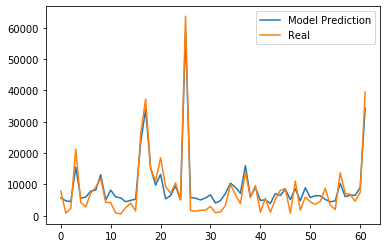

Prediction :  5676.959285714286       real : 7871.0
Prediction :  4775.373571428571       real : 845.0
Prediction :  4504.897857142857       real : 2330.0
Prediction :  15504.243571428571       real : 21272.0
Prediction :  5586.800714285714       real : 4224.0
Prediction :  5947.435       real : 2826.0
Prediction :  7885.844285714285       real : 7320.0
Prediction :  8156.32       real : 9125.0
Prediction :  13115.041428571429       real : 11900.0
Prediction :  5045.8492857142855       real : 4300.0
Prediction :  8201.399285714286       real : 4150.0
Prediction :  5992.5142857142855       real : 900.0
Prediction :  5722.038571428571       real : 583.0
Prediction :  4459.818571428572       real : 2565.0
Prediction :  4910.611428571428       real : 4047.0
Prediction :  5271.245714285715       real : 1520.0
Prediction :  23212.801428571427       real : 25910.0
Prediction :  33941.671428571426       real : 37286.0
Prediction :  15233.767857142857       real : 15052.0
Prediction :  9779.174

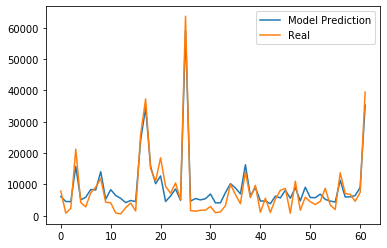

Prediction :  6127.752142857143       real : 7871.0
Prediction :  4549.977142857143       real : 845.0
Prediction :  4504.897857142857       real : 2330.0
Prediction :  15729.64       real : 21272.0
Prediction :  5090.928571428572       real : 4224.0
Prediction :  5902.355714285714       real : 2826.0
Prediction :  8381.716428571428       real : 7320.0
Prediction :  8246.478571428572       real : 9125.0
Prediction :  14061.706428571428       real : 11900.0
Prediction :  5271.245714285715       real : 4300.0
Prediction :  8336.637142857144       real : 4150.0
Prediction :  6488.386428571429       real : 900.0
Prediction :  5541.721428571429       real : 583.0
Prediction :  4189.342857142858       real : 2565.0
Prediction :  4865.532142857143       real : 4047.0
Prediction :  4549.977142857143       real : 1520.0
Prediction :  24069.307857142856       real : 25910.0
Prediction :  34482.62285714286       real : 37286.0
Prediction :  15729.64       real : 15052.0
Prediction :  10229.967142

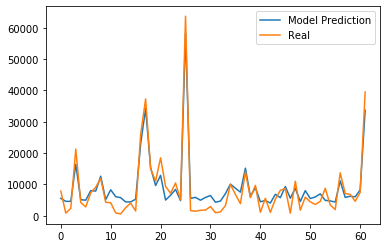

Prediction :  5541.721428571429       real : 7871.0
Prediction :  4595.056428571428       real : 845.0
Prediction :  4595.056428571428       real : 2330.0
Prediction :  16450.908571428572       real : 21272.0
Prediction :  5136.007857142858       real : 4224.0
Prediction :  4955.690714285714       real : 2826.0
Prediction :  8021.082142857143       real : 7320.0
Prediction :  7885.844285714285       real : 9125.0
Prediction :  12619.169285714286       real : 11900.0
Prediction :  5136.007857142858       real : 4300.0
Prediction :  8291.557857142856       real : 4150.0
Prediction :  6082.6728571428575       real : 900.0
Prediction :  5767.117857142857       real : 583.0
Prediction :  4414.739285714286       real : 2565.0
Prediction :  4414.739285714286       real : 4047.0
Prediction :  5271.245714285715       real : 1520.0
Prediction :  22897.246428571427       real : 25910.0
Prediction :  34212.147142857146       real : 37286.0
Prediction :  15369.005714285715       real : 15052.0
Pred

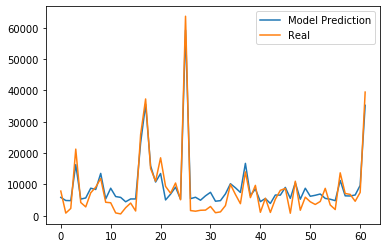

Prediction :  5857.276428571428       real : 7871.0
Prediction :  4865.532142857143       real : 845.0
Prediction :  4820.452857142857       real : 2330.0
Prediction :  16315.670714285714       real : 21272.0
Prediction :  5316.325       real : 4224.0
Prediction :  5676.959285714286       real : 2826.0
Prediction :  8787.43       real : 7320.0
Prediction :  8381.716428571428       real : 9125.0
Prediction :  13520.755       real : 11900.0
Prediction :  5361.404285714286       real : 4300.0
Prediction :  8787.43       real : 4150.0
Prediction :  6127.752142857143       real : 900.0
Prediction :  5857.276428571428       real : 583.0
Prediction :  4459.818571428572       real : 2565.0
Prediction :  5361.404285714286       real : 4047.0
Prediction :  5361.404285714286       real : 1520.0
Prediction :  23257.880714285715       real : 25910.0
Prediction :  35564.525714285715       real : 37286.0
Prediction :  15909.957142857143       real : 15052.0
Prediction :  10770.918571428572       real

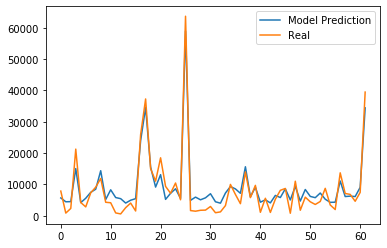

Prediction :  5676.959285714286       real : 7871.0
Prediction :  4459.818571428572       real : 845.0
Prediction :  4504.897857142857       real : 2330.0
Prediction :  15053.450714285715       real : 21272.0
Prediction :  4189.342857142858       real : 4224.0
Prediction :  5586.800714285714       real : 2826.0
Prediction :  7480.130714285714       real : 7320.0
Prediction :  8471.875       real : 9125.0
Prediction :  14377.261428571428       real : 11900.0
Prediction :  5181.087142857143       real : 4300.0
Prediction :  8291.557857142856       real : 4150.0
Prediction :  5812.197142857143       real : 900.0
Prediction :  5451.562857142857       real : 583.0
Prediction :  4054.105       real : 2565.0
Prediction :  4955.690714285714       real : 4047.0
Prediction :  5451.562857142857       real : 1520.0
Prediction :  23979.149285714284       real : 25910.0
Prediction :  34572.78142857143       real : 37286.0
Prediction :  15549.322857142857       real : 15052.0
Prediction :  9148.06428

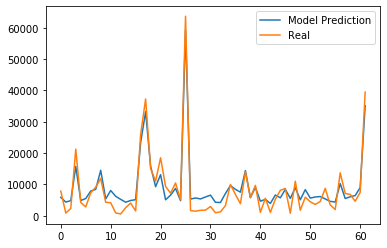

Prediction :  5857.276428571428       real : 7871.0
Prediction :  4369.66       real : 845.0
Prediction :  4820.452857142857       real : 2330.0
Prediction :  15729.64       real : 21272.0
Prediction :  4865.532142857143       real : 4224.0
Prediction :  5496.642142857143       real : 2826.0
Prediction :  7885.844285714285       real : 7320.0
Prediction :  8426.795714285714       real : 9125.0
Prediction :  14512.499285714286       real : 11900.0
Prediction :  5361.404285714286       real : 4300.0
Prediction :  8066.161428571429       real : 4150.0
Prediction :  6217.910714285715       real : 900.0
Prediction :  5226.166428571429       real : 583.0
Prediction :  4324.580714285714       real : 2565.0
Prediction :  4865.532142857143       real : 4047.0
Prediction :  5136.007857142858       real : 1520.0
Prediction :  23348.039285714287       real : 25910.0
Prediction :  33220.40285714286       real : 37286.0
Prediction :  15819.798571428571       real : 15052.0
Prediction :  9283.3021428

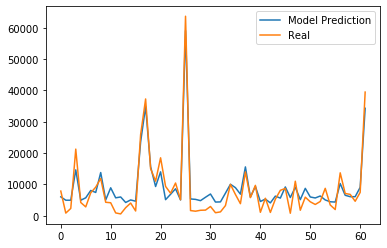

Prediction :  6037.5935714285715       real : 7871.0
Prediction :  4955.690714285714       real : 845.0
Prediction :  4955.690714285714       real : 2330.0
Prediction :  14647.737142857142       real : 21272.0
Prediction :  4955.690714285714       real : 4224.0
Prediction :  5722.038571428571       real : 2826.0
Prediction :  8066.161428571429       real : 7320.0
Prediction :  7435.051428571429       real : 9125.0
Prediction :  13791.230714285713       real : 11900.0
Prediction :  5045.8492857142855       real : 4300.0
Prediction :  8922.667857142857       real : 4150.0
Prediction :  5722.038571428571       real : 900.0
Prediction :  5992.5142857142855       real : 583.0
Prediction :  4234.422142857143       real : 2565.0
Prediction :  5045.8492857142855       real : 4047.0
Prediction :  4640.135714285714       real : 1520.0
Prediction :  23573.435714285715       real : 25910.0
Prediction :  34888.33642857143       real : 37286.0
Prediction :  15639.48142857143       real : 15052.0
Pre

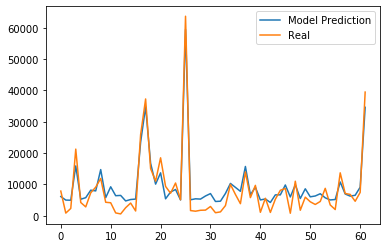

Prediction :  6127.752142857143       real : 7871.0
Prediction :  5000.77       real : 845.0
Prediction :  4955.690714285714       real : 2330.0
Prediction :  15909.957142857143       real : 21272.0
Prediction :  5271.245714285715       real : 4224.0
Prediction :  5767.117857142857       real : 2826.0
Prediction :  8156.32       real : 7320.0
Prediction :  7930.923571428571       real : 9125.0
Prediction :  14737.895714285714       real : 11900.0
Prediction :  5767.117857142857       real : 4300.0
Prediction :  9238.222857142857       real : 4150.0
Prediction :  6398.227857142857       real : 900.0
Prediction :  6488.386428571429       real : 583.0
Prediction :  4730.294285714286       real : 2565.0
Prediction :  5181.087142857143       real : 4047.0
Prediction :  5316.325       real : 1520.0
Prediction :  23483.277142857143       real : 25910.0
Prediction :  34798.17785714286       real : 37286.0
Prediction :  16766.463571428572       real : 15052.0
Prediction :  10094.729285714286   

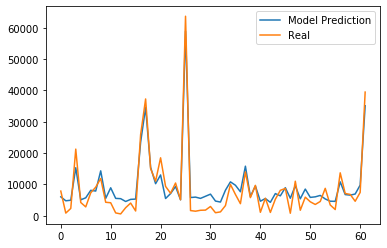

Prediction :  6037.5935714285715       real : 7871.0
Prediction :  4775.373571428571       real : 845.0
Prediction :  4955.690714285714       real : 2330.0
Prediction :  15323.926428571429       real : 21272.0
Prediction :  5090.928571428572       real : 4224.0
Prediction :  5722.038571428571       real : 2826.0
Prediction :  8111.240714285715       real : 7320.0
Prediction :  7885.844285714285       real : 9125.0
Prediction :  14332.182142857142       real : 11900.0
Prediction :  5541.721428571429       real : 4300.0
Prediction :  8922.667857142857       real : 4150.0
Prediction :  5541.721428571429       real : 900.0
Prediction :  5451.562857142857       real : 583.0
Prediction :  4549.977142857143       real : 2565.0
Prediction :  5226.166428571429       real : 4047.0
Prediction :  5316.325       real : 1520.0
Prediction :  23483.277142857143       real : 25910.0
Prediction :  34572.78142857143       real : 37286.0
Prediction :  15459.164285714285       real : 15052.0
Prediction :  

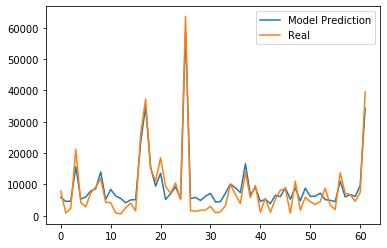

Prediction :  5857.276428571428       real : 7871.0
Prediction :  4549.977142857143       real : 845.0
Prediction :  4685.215       real : 2330.0
Prediction :  15639.48142857143       real : 21272.0
Prediction :  5316.325       real : 4224.0
Prediction :  5992.5142857142855       real : 2826.0
Prediction :  7885.844285714285       real : 7320.0
Prediction :  8607.112857142856       real : 9125.0
Prediction :  13971.547857142858       real : 11900.0
Prediction :  5181.087142857143       real : 4300.0
Prediction :  8426.795714285714       real : 4150.0
Prediction :  6308.069285714286       real : 900.0
Prediction :  5541.721428571429       real : 583.0
Prediction :  4144.263571428572       real : 2565.0
Prediction :  5045.8492857142855       real : 4047.0
Prediction :  5136.007857142858       real : 1520.0
Prediction :  23393.11857142857       real : 25910.0
Prediction :  34798.17785714286       real : 37286.0
Prediction :  15459.164285714285       real : 15052.0
Prediction :  9418.54   

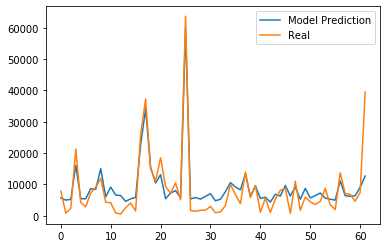

Prediction :  5676.959285714286       real : 7871.0
Prediction :  5000.77       real : 845.0
Prediction :  5226.166428571429       real : 2330.0
Prediction :  16090.274285714286       real : 21272.0
Prediction :  5451.562857142857       real : 4224.0
Prediction :  5406.483571428572       real : 2826.0
Prediction :  8652.192142857144       real : 7320.0
Prediction :  8426.795714285714       real : 9125.0
Prediction :  15053.450714285715       real : 11900.0
Prediction :  5992.5142857142855       real : 4300.0
Prediction :  9148.064285714287       real : 4150.0
Prediction :  6623.624285714286       real : 900.0
Prediction :  6443.307142857143       real : 583.0
Prediction :  4595.056428571428       real : 2565.0
Prediction :  5406.483571428572       real : 4047.0
Prediction :  5857.276428571428       real : 1520.0
Prediction :  22671.85       real : 25910.0
Prediction :  34167.06785714286       real : 37286.0
Prediction :  15414.085       real : 15052.0
Prediction :  10455.363571428572  

In [7]:
all_test_y = []
all_test_predication = []
avg_ame=0
for i in range(number_of_folds):
    print(" ")
    print("Fold ","#",i+1)
    start  = time.time()
    model = RegressionTsetlinMachine(3000, 1400, 3.2)
    
    train_data, test_data = trainTestSpliter(foldsIndex[i],scaled_data)
    train_x, train_y, test_x, test_y = dataTargetSpluter(train_data,test_data)
    
    b = Binarizer(max_bits_per_feature = 10)
    b.fit(train_x)
    X_transformed_train = b.transform(train_x)
    
    b = Binarizer(max_bits_per_feature = 10)
    b.fit(test_x)
    X_transformed_test = b.transform(test_x)
    
    model.fit(X_transformed_train, train_y, epochs=150)
    
    all_data_x =[]
    all_data_y = []

    for i in scaled_data:
        all_data_x.append(i[:25])
        all_data_y.append(i[25])

    all_data_x = np.array(all_data_x)
    all_data_y = np.array(all_data_y)
    
    b = Binarizer(max_bits_per_feature = 10)
    b.fit(all_data_x)
    X_transformed_all_data_x = b.transform(all_data_x)
    prediction = model.predict(X_transformed_all_data_x)
    end = time.time()

    plt.plot(prediction, label="Model Prediction")
    plt.plot(all_data_y, label="Real")
    plt.legend()
    plt.show()


    for i in range(len(prediction)):
        print("Prediction : ", prediction[i],"     ","real :", all_data_y[i])
    print("All-data-MAE: ",mean_absolute_error(all_data_y,prediction))
    
    prediction = model.predict(X_transformed_test)
    print("Test-MAE: ",mean_absolute_error(test_y,prediction))
    all_test_y.append(test_y)
    all_test_predication.append(prediction)
    avg_ame+=mean_absolute_error(test_y,prediction)
    print("Took: ",end-start, "Seconds")
    print("#################################################################################################")
print("\n \n avg test-MAE : ",avg_ame/number_of_folds)

In [8]:
import statistics 
maes=[]
pred_25 = []
pred_50 = []
for i in range(len(all_test_y)):
    #print((abs(all_test_y[i]-all_test_predication[i])/all_test_y[i]))
    maes.append((abs(all_test_y[i]-all_test_predication[i])/all_test_y[i]))
    if (abs(all_test_y[i]-all_test_predication[i])/all_test_y[i])<0.25:
        pred_25.append(abs(all_test_y[i]-all_test_predication[i])/all_test_y[i])
    if (abs(all_test_y[i]-all_test_predication[i])/all_test_y[i])<0.50:
        pred_50.append(abs(all_test_y[i]-all_test_predication[i])/all_test_y[i])
sum = 0
for i in maes:
    sum+=i
print("MMRE", sum/len(maes))
print("PRED 0.25: ", (((100/62)*len(pred_25)))/100)
print("PRED 0.50: ", (((100/62)*len(pred_50)))/100)
print("Median: ",statistics.median(maes))

MMRE [4.72622709]
PRED 0.25:  0.06451612903225806
PRED 0.50:  0.14516129032258063
Median:  [2.15227602]
